In [1]:
import os
print(os.listdir())


['.anaconda', '.android', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.VirtualBox', '.vscode', '.zenmap', 'anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{62a2397a-f76c-11ef-acc4-9ee242725eec}.TM.blf', 'NTUSER.DAT{62a2397a-f76c-11ef-acc4-9ee242725eec}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{62a2397a-f76c-11ef-acc4-9ee242725eec}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Smartphones_cleaned_dataset.csv', 'Start Menu', 'Task 1.ipynb', 'task.ipynb', 'task1..ipynb', 'Templates', 'Titanic-Dataset.csv', 'Titanic-Dataset.csv.csv', 'Titanic_Cleaned.csv', 'Untitled.ipynb', 'Videos', 'VirtualBox VMs']


In [3]:
import pandas as pd
df = pd.read_csv('Smartphones_cleaned_Dataset.csv')
df.head()


brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120                 3                1.0  android   
1           120                 3                1.0  android   
2            90                 3                1.0  android   
3           120                 3                1.0  android   
4           120                 3                1.0  android   

   primary_camera_rear  primary_camera_front  extended_memory_available  \
0                 50.0                  16.0                          0   
1                 64.0                  16.0                          1   
2                 50.0                  13.0                          1   
3                 50.0                  16.0                          1   
4                108.0                  16.0                          0   

   extended_upto  resolution_width resolution_height  
0            NaN              1440              3216  
1         1024.0              1080              2412  
2         1024.0              1080              2408  
3         1024.0              1080              2400  
4            NaN              1080              2412  

[5 rows x 26 columns]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('smartphones_cleaned_dataset.csv')
df.info()
df.describe()
df.isnull().mean().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

extended_upto                0.489796
fast_charging                0.215306
rating                       0.103061
processor_speed              0.042857
processor_brand              0.020408
os                           0.014286
battery_capacity             0.011224
num_cores                    0.006122
primary_camera_front         0.005102
num_front_cameras            0.004082
brand_name                   0.000000
refresh_rate                 0.000000
resolution_width             0.000000
extended_memory_available    0.000000
primary_camera_rear          0.000000
num_rear_cameras             0.000000
ram_capacity                 0.000000
screen_size                  0.000000
internal_memory              0.000000
model                        0.000000
fast_charging_available      0.000000
has_ir_blaster               0.000000
has_nfc                      0.000000
has_5g                       0.000000
price                        0.000000
resolution_height            0.000000
dtype: float

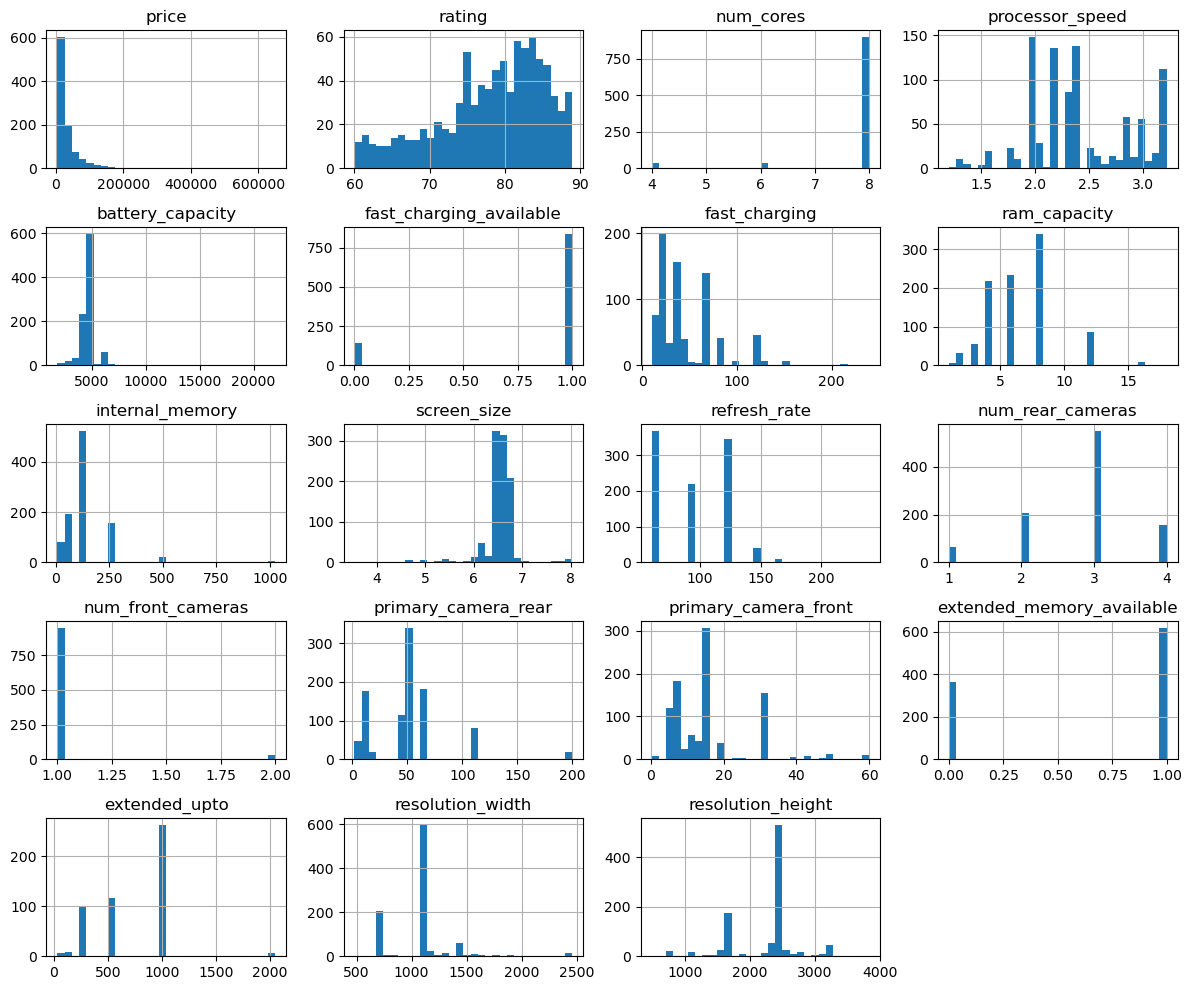

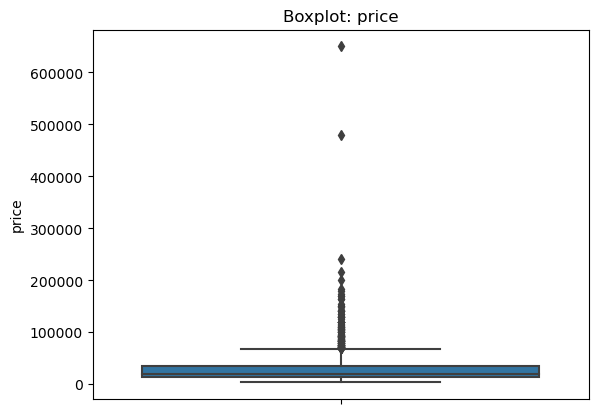

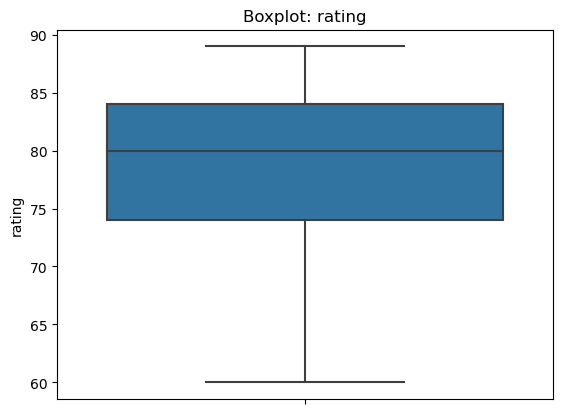

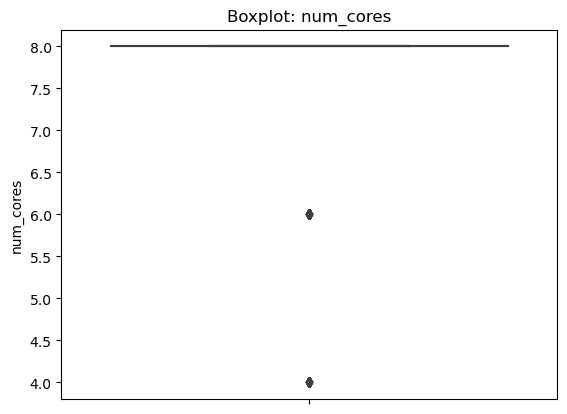

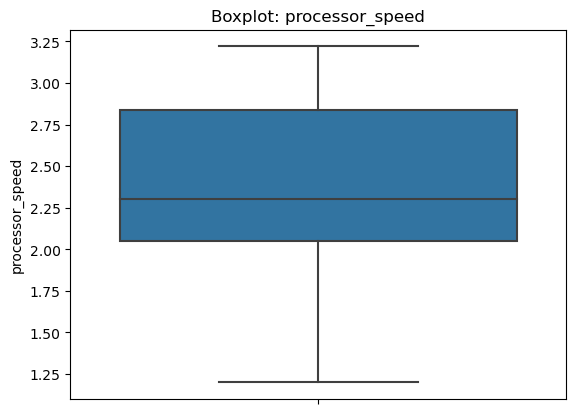

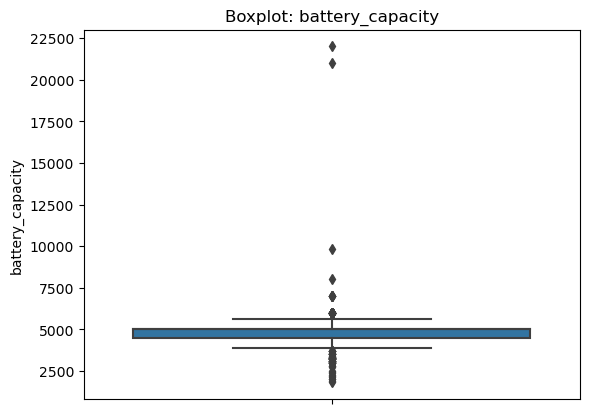

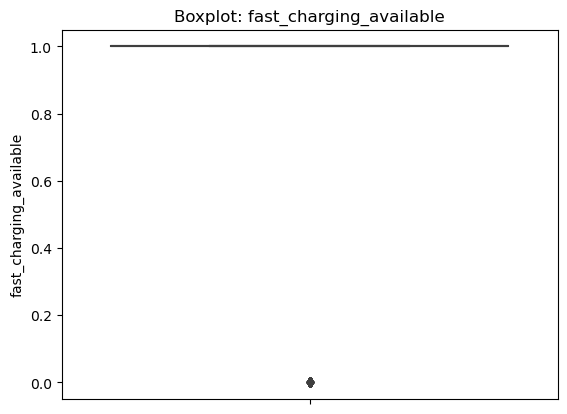

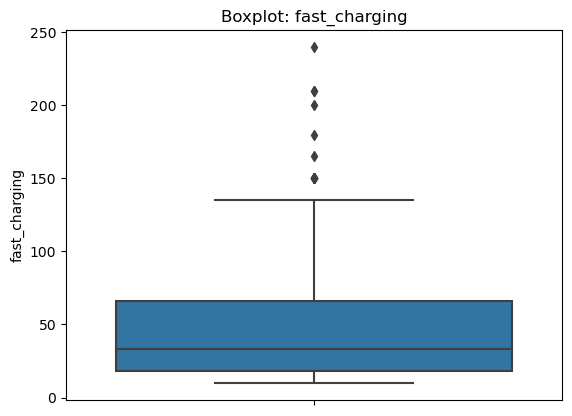

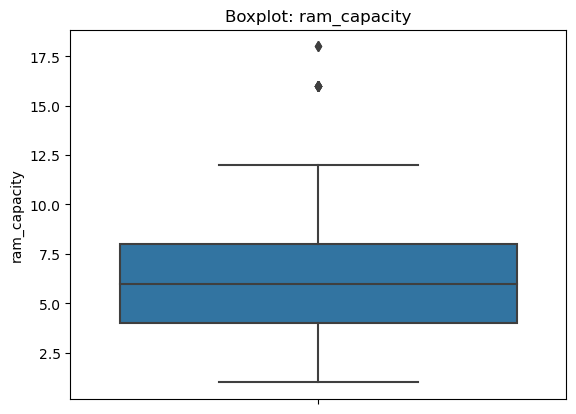

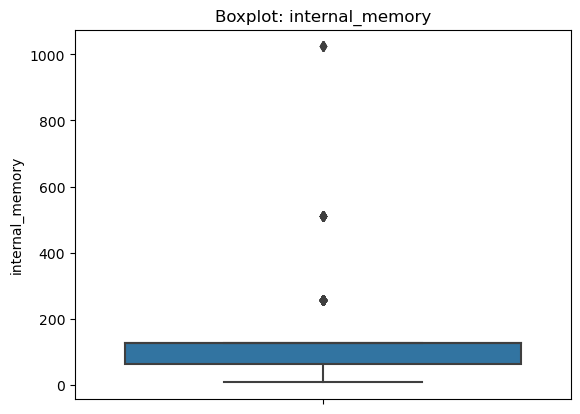

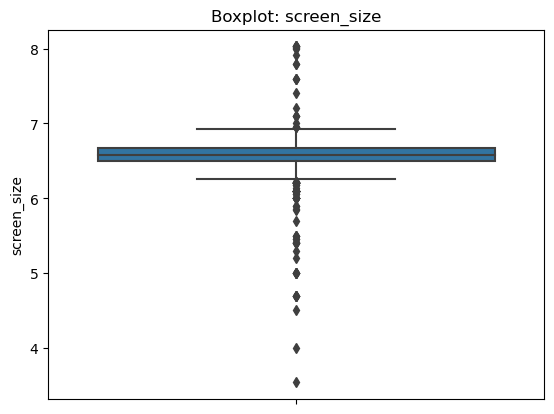

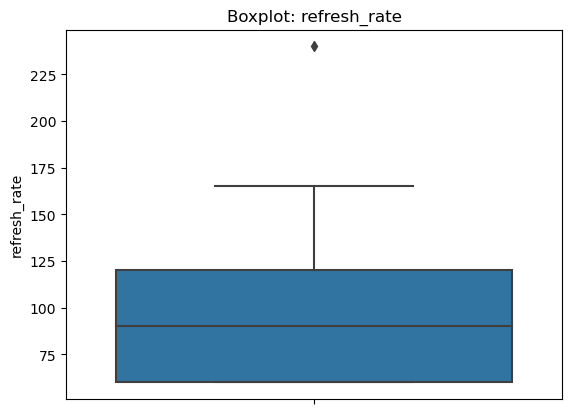

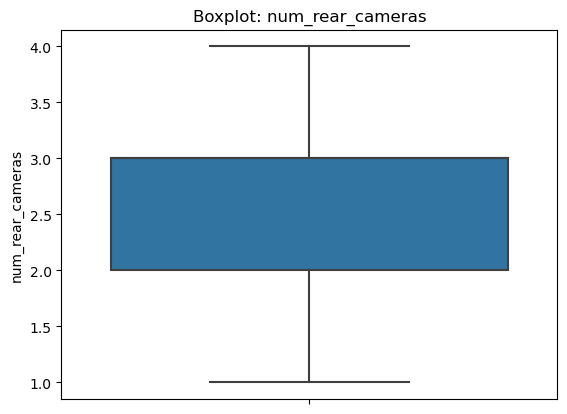

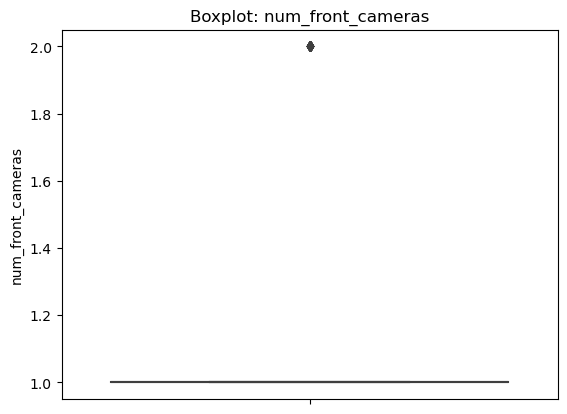

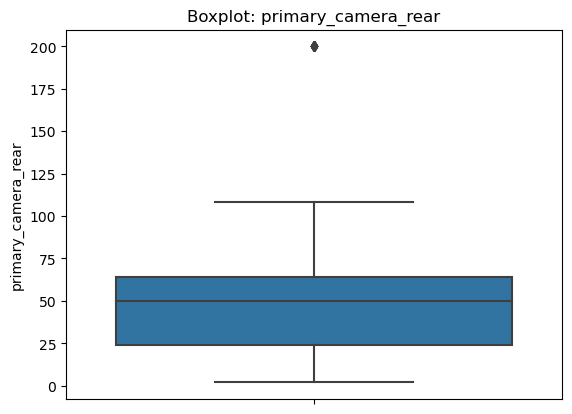

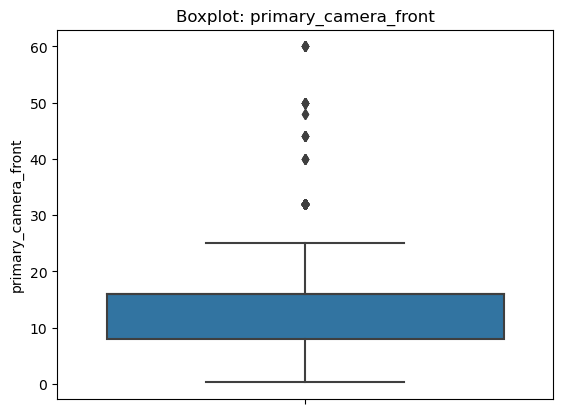

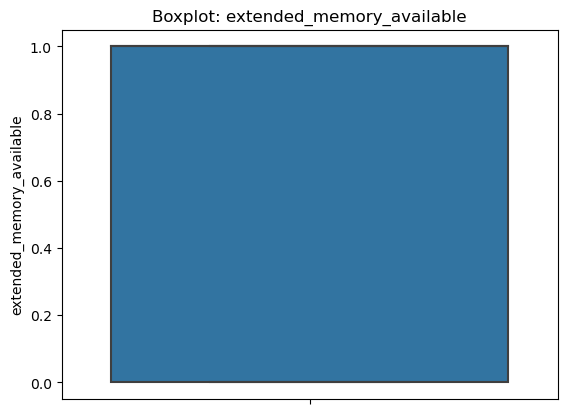

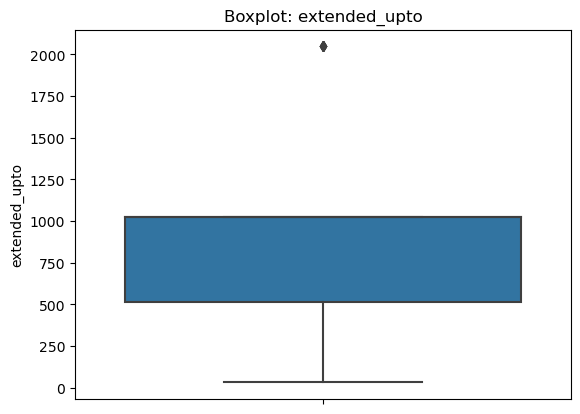

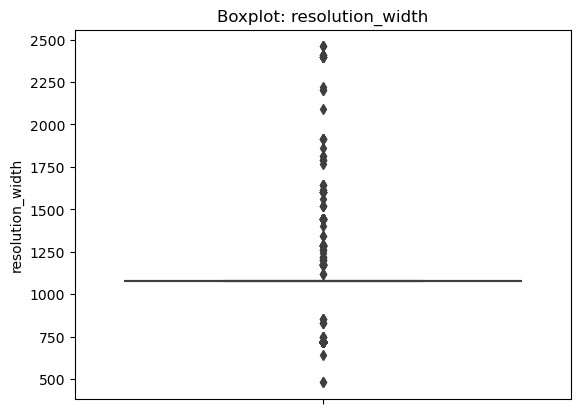

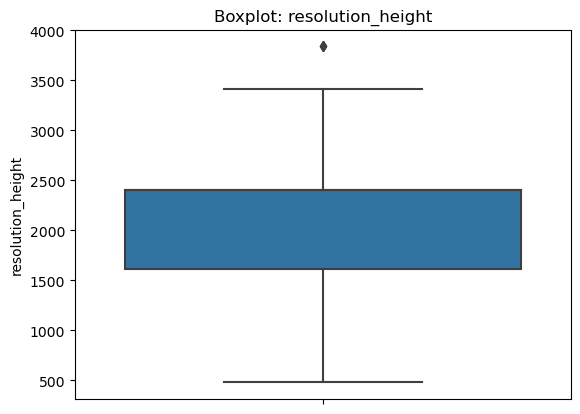

In [2]:

num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols].hist(figsize=(12,10), bins=30)
plt.tight_layout(); plt.show()

for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()

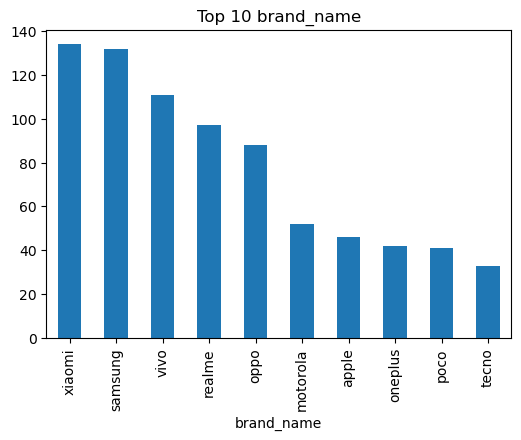

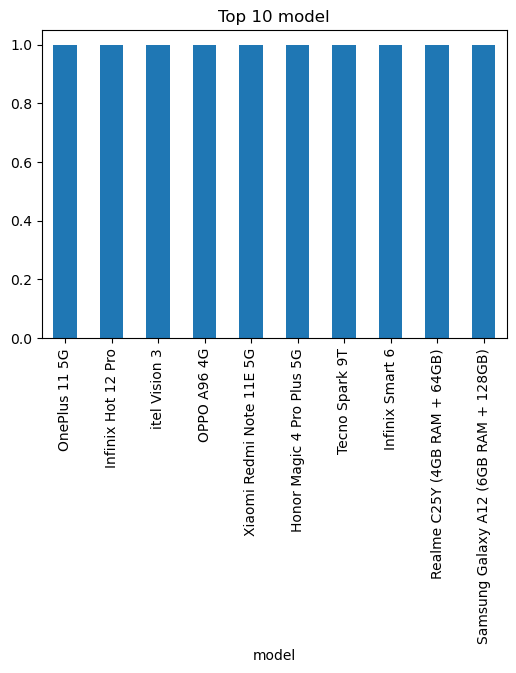

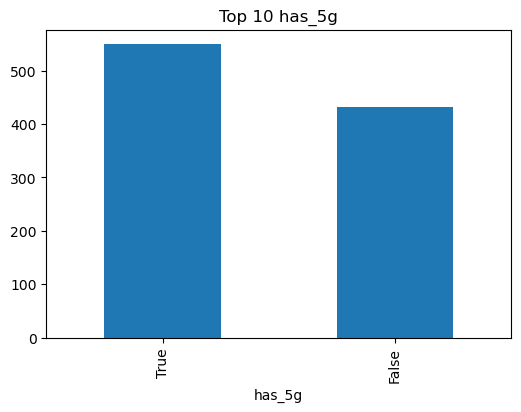

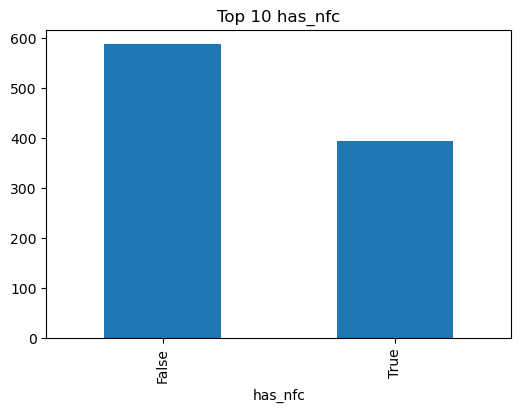

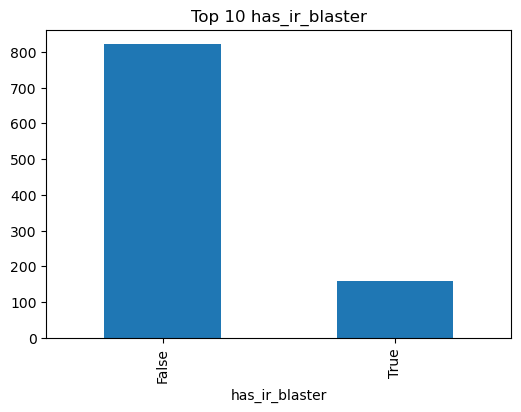

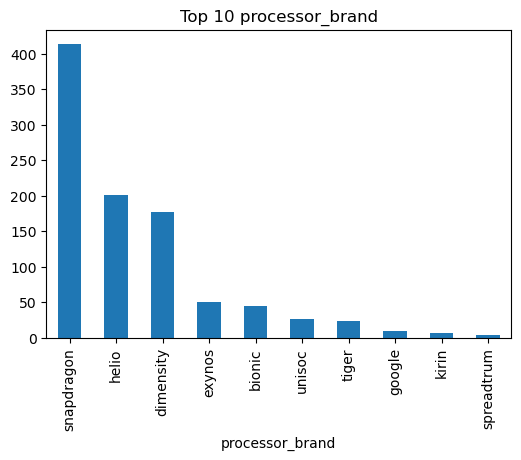

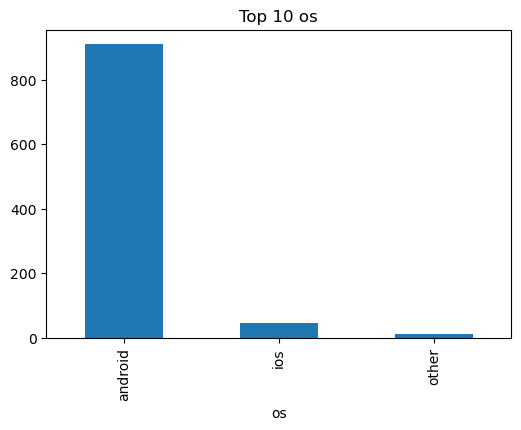

In [4]:
cat_cols = df.select_dtypes(include=['object','bool','category']).columns
for col in cat_cols:
    df[col].value_counts().nlargest(10).plot(kind='bar', figsize=(6,4))
    plt.title(f'Top 10 {col}')
    plt.show()


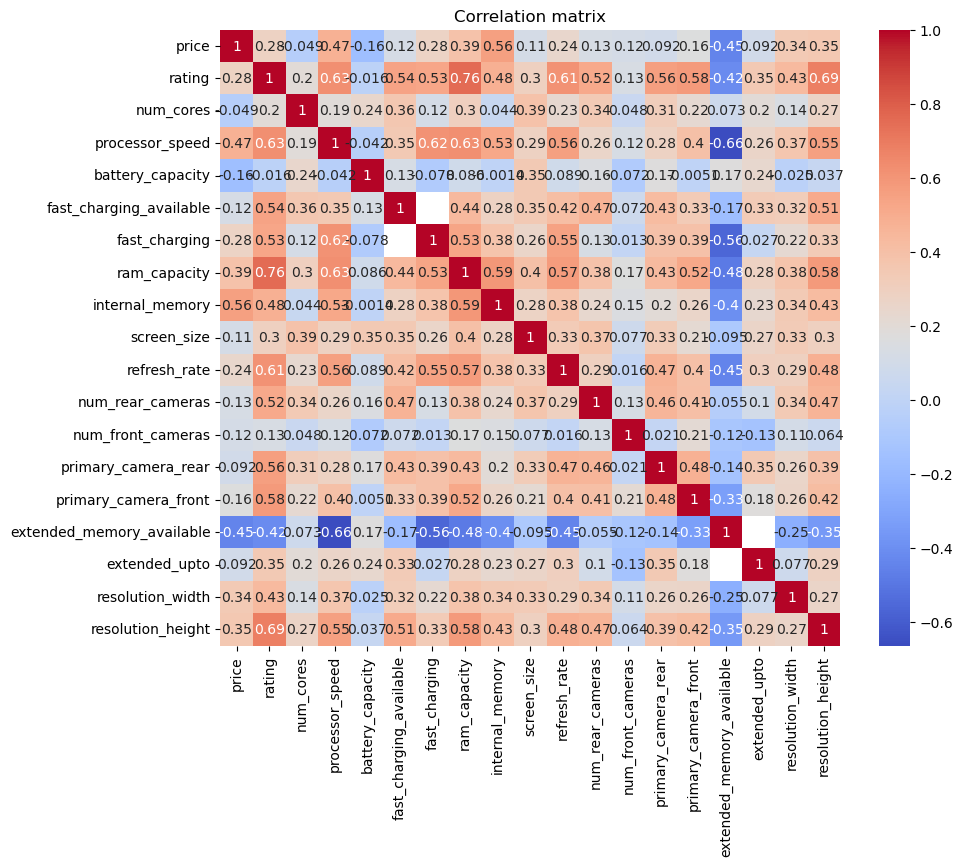

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


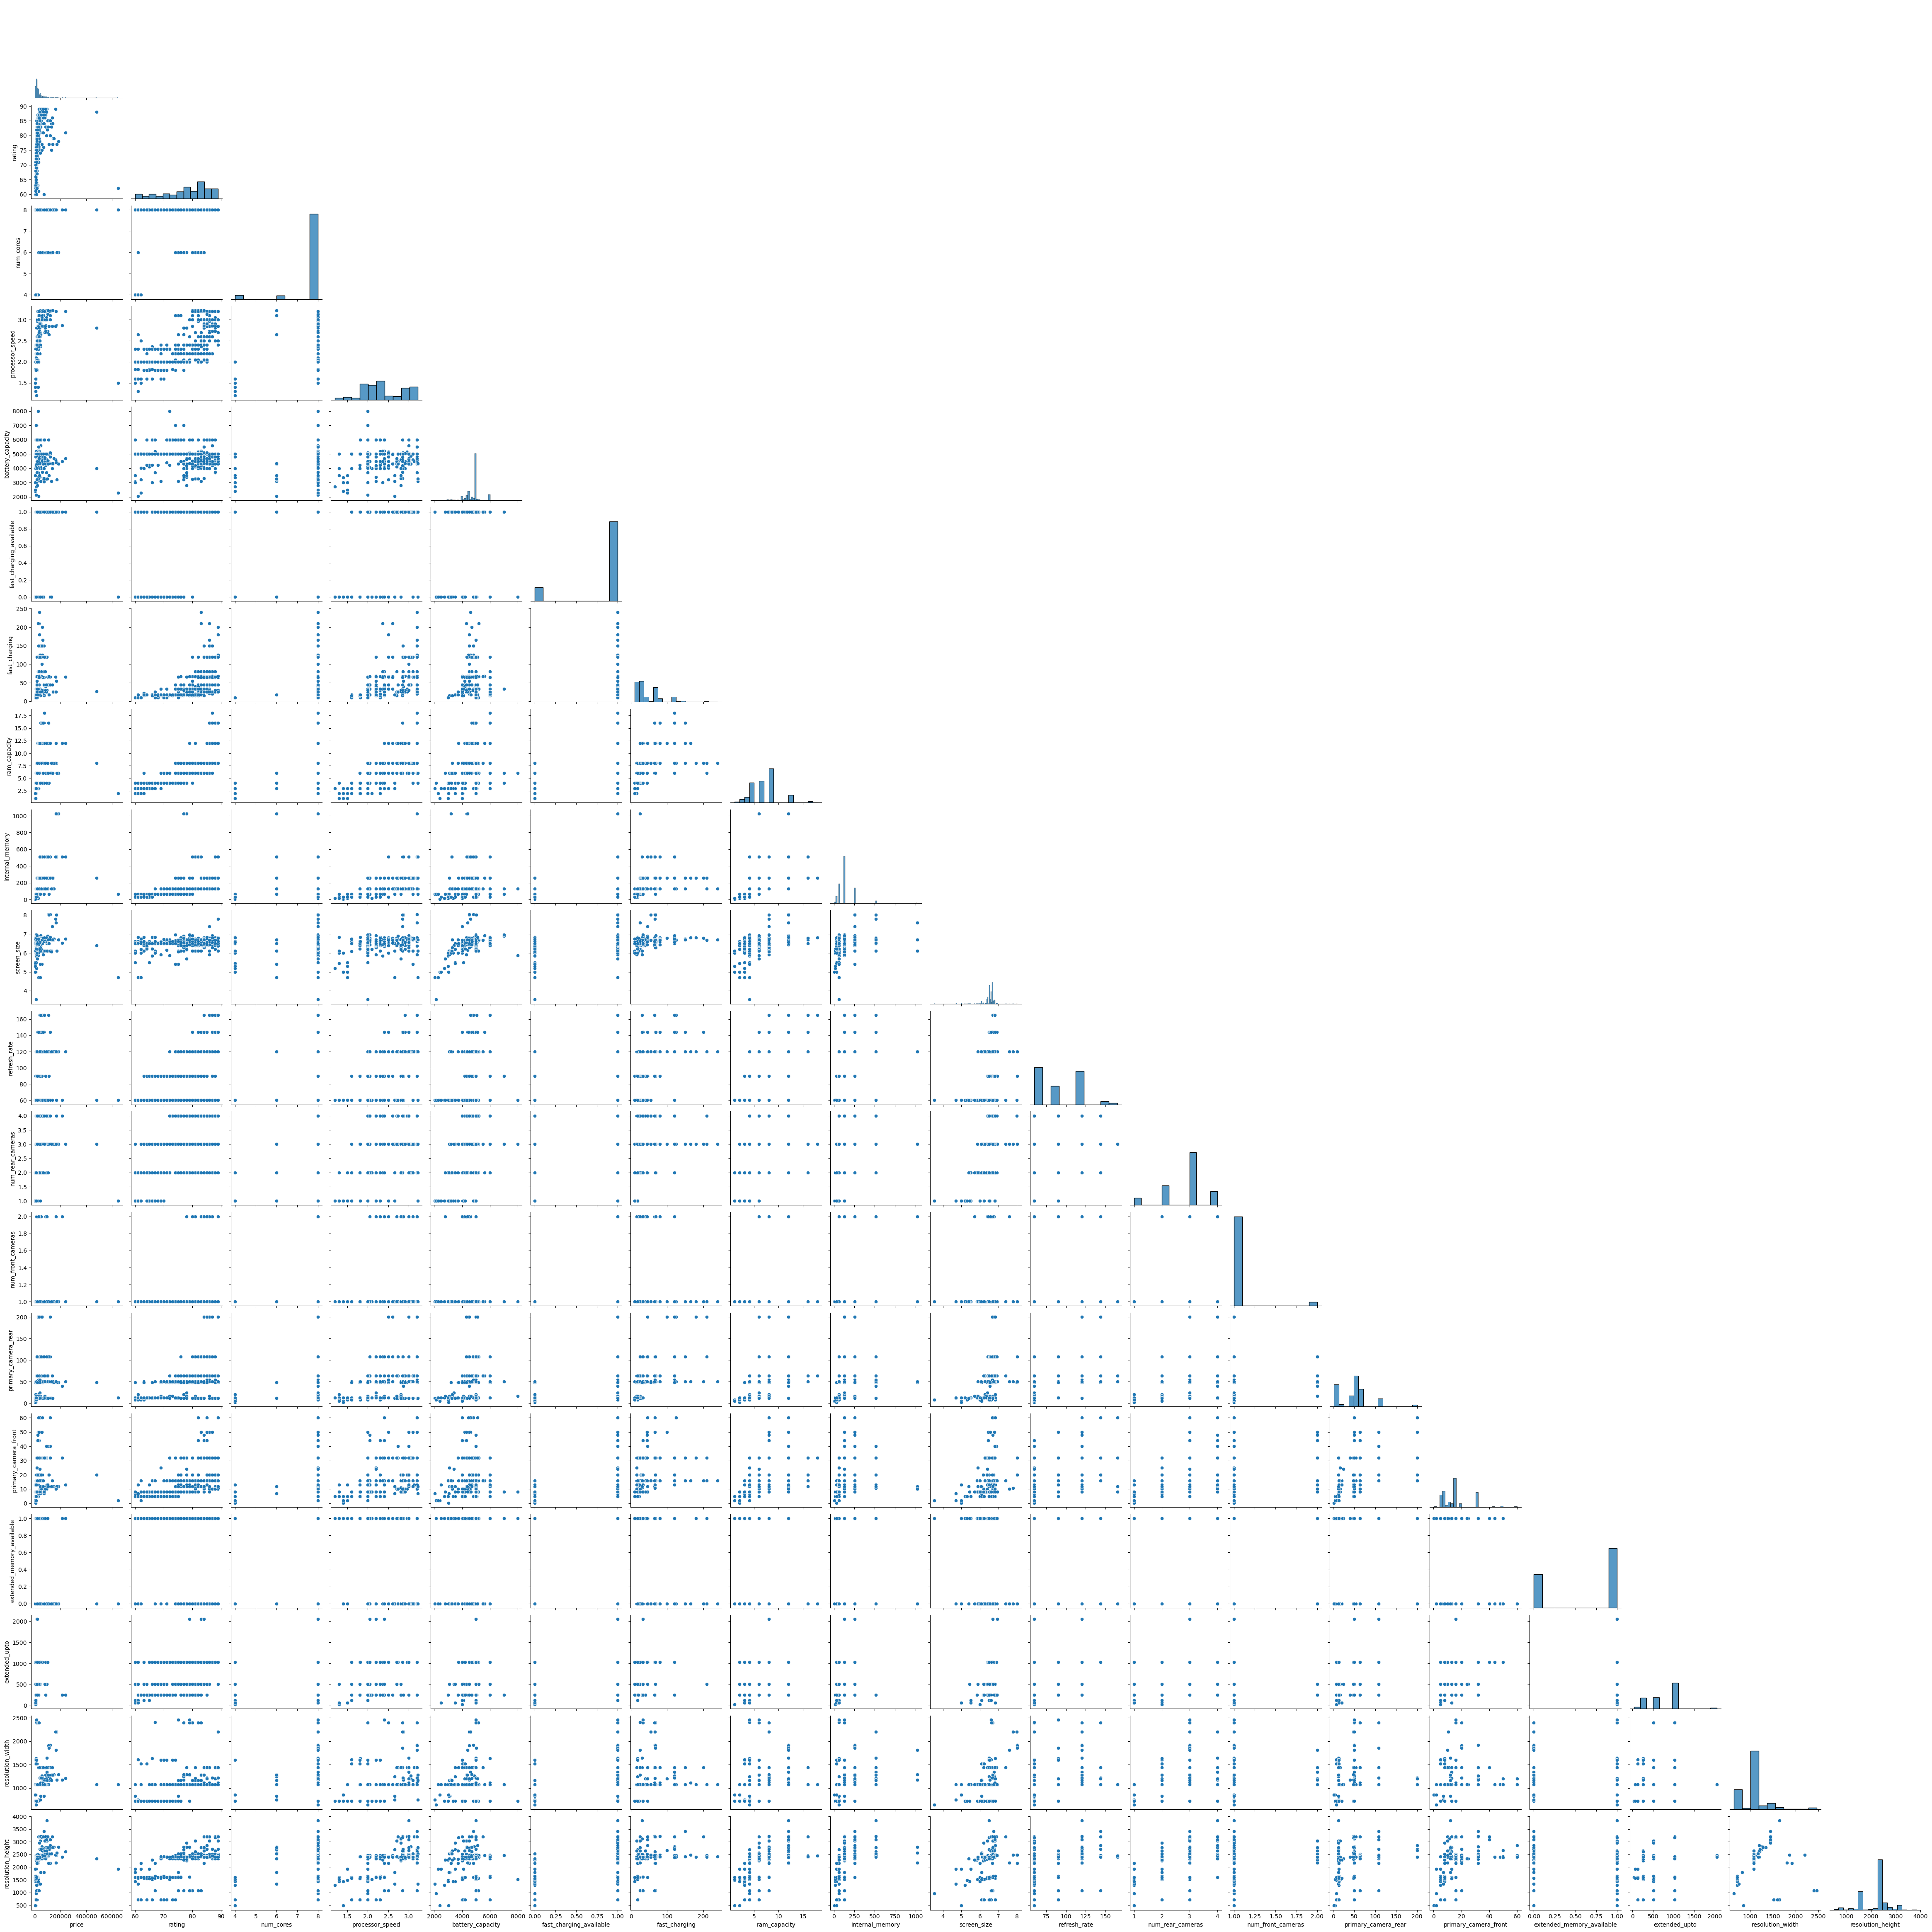

In [5]:

corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

sns.pairplot(df[num_cols].sample(500), corner=True)
plt.show()


In [8]:
fig = px.scatter(df, x='price', y='rating', color='brand_name',
                 hover_data=['ram_capacity','battery_capacity'],
                 title='Price vs Rating by Brand')
fig.show()

In [6]:
df[num_cols].skew().sort_values(ascending=False).to_csv('skewness_report.csv')